<a id=2><h1 align='center'><font>Hotel Booking Analysis</font> 

### In this Project I am going to analyze a dataset which contains the demand of hotel bookings. I got this dataset from *[kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand)*

### The data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.


## Table of Contents
<ul>
<li><a href="#1">Import Libraries, Functions and Data</a></li>
<li><a href="#2">Exploring Data</a></li>
<li><a href="#3">Exploring Summary</a></li>
<li><a href="#4">Cleaning</a></li>    
<li><a href="#5">Visualization</a></li>
<li><a href="#6">Conclusion</a></li>
  
</ul>

<a id=1><h1 align='center'><font> Import Libraries, Functions and Data</font> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
import plotly.express as px
sns.set_style("darkgrid")
sns.set_context("poster")

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = 20,12

In [2]:
import plotly.express as px 
from urllib.request import urlopen
import json


In [3]:
def missing_percentage(data_frame):
    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """
    total_missing = data_frame.isnull().sum().sort_values(ascending=False)
    total_missing = total_missing[total_missing.values !=0]
    per = np.round(total_missing.values*100.00/len(data_frame), 2)
    df = pd.DataFrame(total_missing, columns=['Number Of Missing Values'])
    return(df.assign(Percentage = per))

###        

In [4]:
# Loading data
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<a id=2><h1 align='center'><font> Exploring Data</font> 

## I will check the  things below to Understand the Dataset:

* shape of our dataset
* Head of the dataset
* Number of samples and columns in each dataset
* Duplicate rows in each dataset
* Datatypes of columns
* Features with missing values
* Number of non-null unique values for features in each dataset
* What those unique values are and counts for each

In [5]:
data.shape

(119390, 32)

###  Based on the cell above 
#### The data set being  has**`87370 records/cells`**  and **`32 columns/variables`**in our data frame.

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
# taking a look at the data
data.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# Check if the data contain duplicated row or not 
data.duplicated().sum()

31994

In [10]:
#Displaying some statistical summaries of the numerical columns:

data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<a id=3><h1 align='center'><font> Exploring Summary</font> 


### From the above I noticed that :
#####  There is Nothing missing values!
##### There is `32001` duplicated values that needs to be dropped!
##### `Company` column needs to be dropped!

<a id=4><h1 align='center'><font >Cleaning</font> 

I'd perform cleaning operations ,which would help me to reach a more accurate result in creating meaningful and informative visualizations.

In [11]:
#Drop Duplicated Values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [12]:
data.drop('company',axis=1,inplace=True)

In [13]:
#Show Missing Values
missing_percentage(data)

,Number Of Missing Values,Percentage
agent,12193,13.95
country,452,0.52
children,4,0.00


<AxesSubplot:xlabel='agent'>

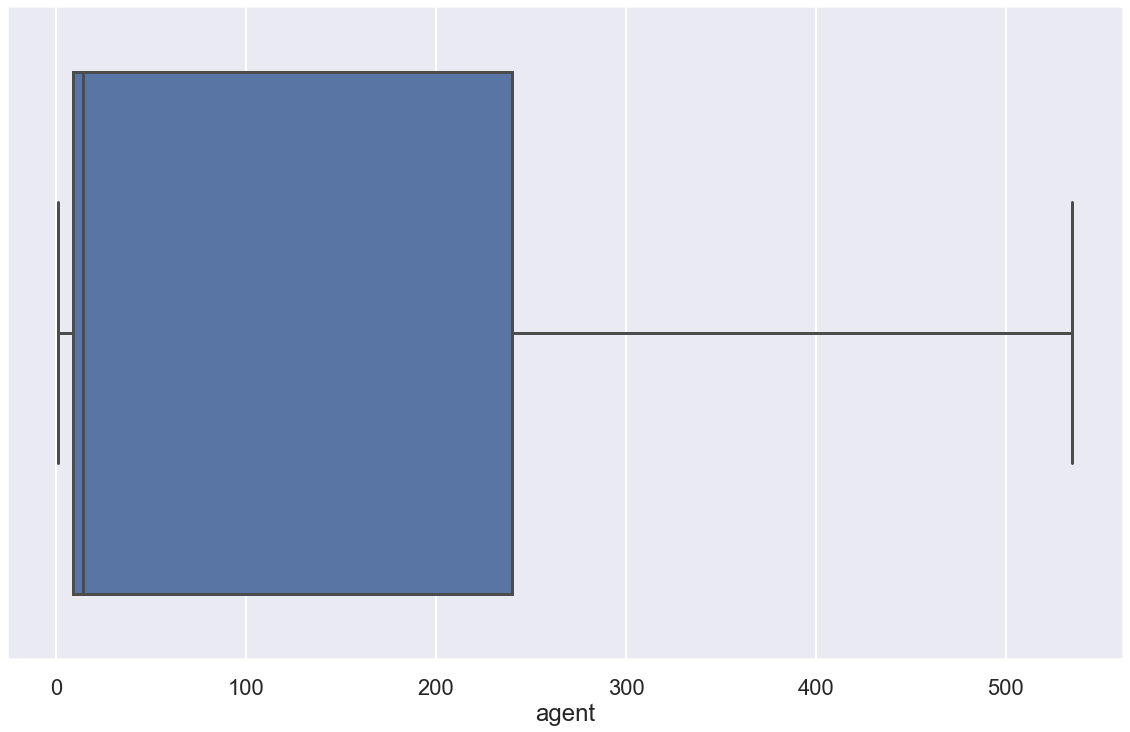

In [14]:
#For agent (float)
sns.boxplot(data=data, x='agent')

> It's skwed positive and there is no outliers, so we can replace the missing values with median.

In [15]:
# For country (object), we can replace the missing values with the mode
data['country'].mode()

0    PRT
dtype: object

<AxesSubplot:xlabel='children'>

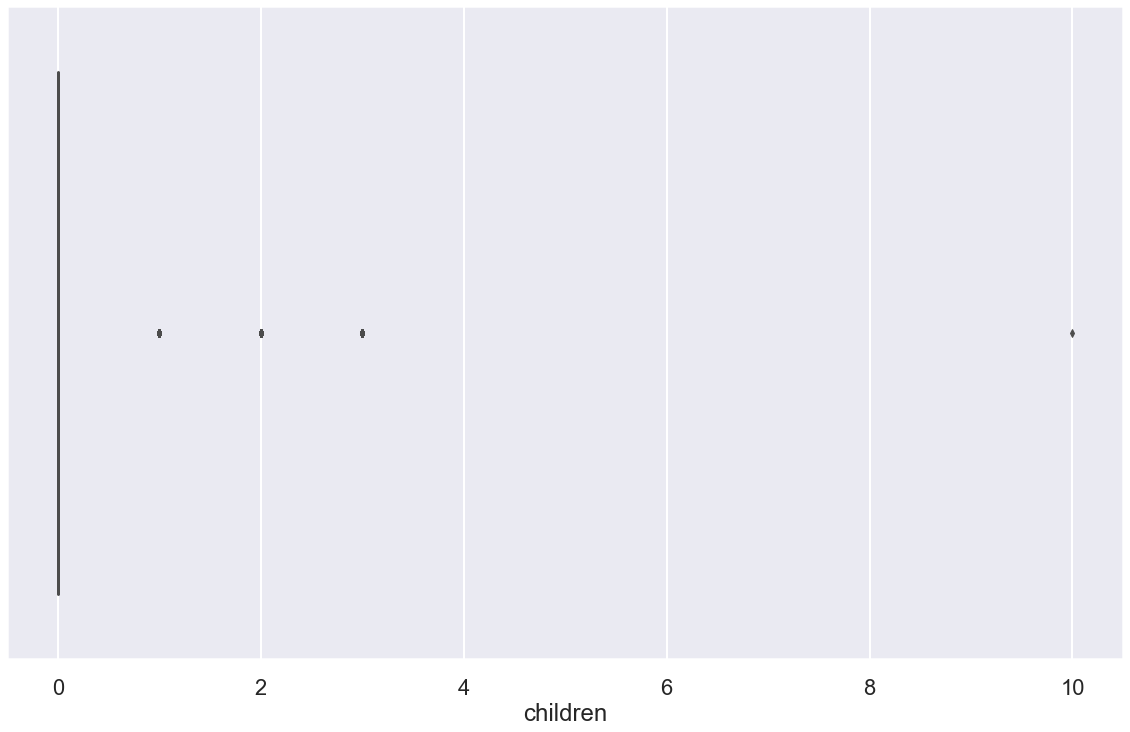

In [16]:
# For children (int), we want to fill the missing values
sns.boxplot(data=data, x='children')

> We can replace the missing values with median because of the outliers.

In [17]:
#Fill missing values
data.fillna({
    'country' :'PRT',
    'children' : data['children'].median(),
    'agent': data['agent'].median()
}, inplace=True)

#Check
data.isnull().sum().sort_values(ascending=False)[:4]

hotel                        0
is_repeated_guest            0
reservation_status           0
total_of_special_requests    0
dtype: int64

### Steps to make analysis easier

In [18]:
cols = ['is_canceled', 'is_repeated_guest']
for i in cols:
    data[i].replace(1, 'yes', inplace=True)
    data[i].replace(0, 'no', inplace=True)
data[cols].head()

,is_canceled,is_repeated_guest
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no


In [19]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [20]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months = dict([(month, i+1) for i,month in enumerate(order)])
#months
data['month'] = data['arrival_date_month'].replace(months)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,no,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,C,C,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,no,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,no,0,0,C,C,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,no,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,no,0,0,A,C,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,no,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,no,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,no,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,no,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [21]:
data.duplicated().sum()

26

In [22]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [23]:
data.isnull().sum().sum()

0

#### I will be making a few changes to clean the data and adding a few columns that might be useful for analysis.
- Droping rows with 0 guests 
- Droping rows with 0 or less than 0 adr (average daily rate)
- Making a seperate df with non-cancelled reservations
- Making a coulmn for total guests by adding the number of adults, children and babies 
- Making a coulmn to find price per guest by dividing adr with total guests

In [24]:
data = data[data['adults'] != 0]

In [25]:
data = data[data['adr'] > 0.00]

In [26]:
data.shape

(85347, 32)

In [27]:
non_cancelled_reservations = data[data['is_canceled'] == 0]
non_cancelled_reservations.shape

(0, 32)

In [28]:
non_cancelled_reservations['Total Guests'] = non_cancelled_reservations['adults'] + non_cancelled_reservations['children'] + non_cancelled_reservations['babies']

In [29]:
non_cancelled_reservations['price_per_guest'] = non_cancelled_reservations['adr']/(non_cancelled_reservations['adults'] + non_cancelled_reservations['children'] + non_cancelled_reservations['babies'])

Before asking questions to the data, I would like to analyze a few columns. 


In [30]:
non_cancelled_reservations['arrival_date_year'].unique()

array([], dtype=int64)

The dataset has data from the year 2015 to 2017. 

In [31]:
data.to_csv('clean_hotel_booking.csv', index=False)

#    

<a id=5><h1 align='center'>Visualization

Text(0.5, 1.0, 'Hotels')

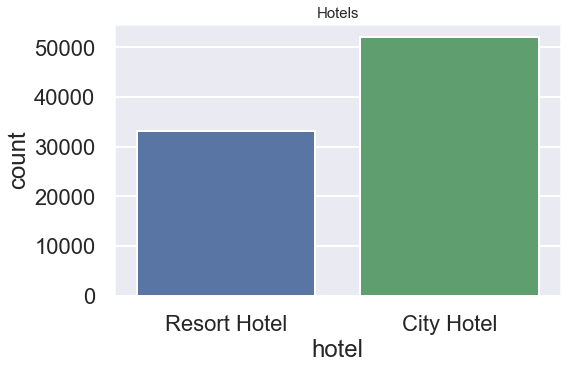

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='hotel')
plt.title('Hotels', fontsize=15)

#  

Text(0, 0.5, '')

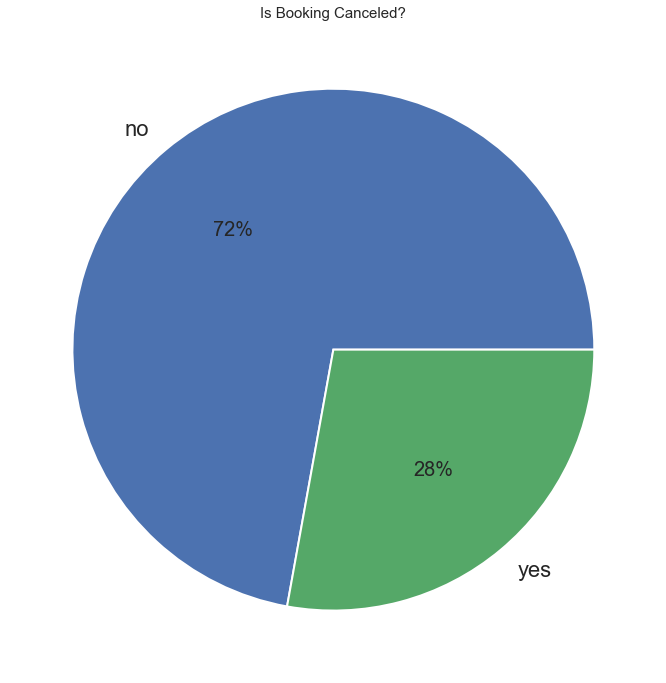

In [33]:
data['is_canceled'].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Is Booking Canceled?', fontsize=15)
plt.ylabel('')

####         

Text(0.5, 0.98, 'People Distribution')

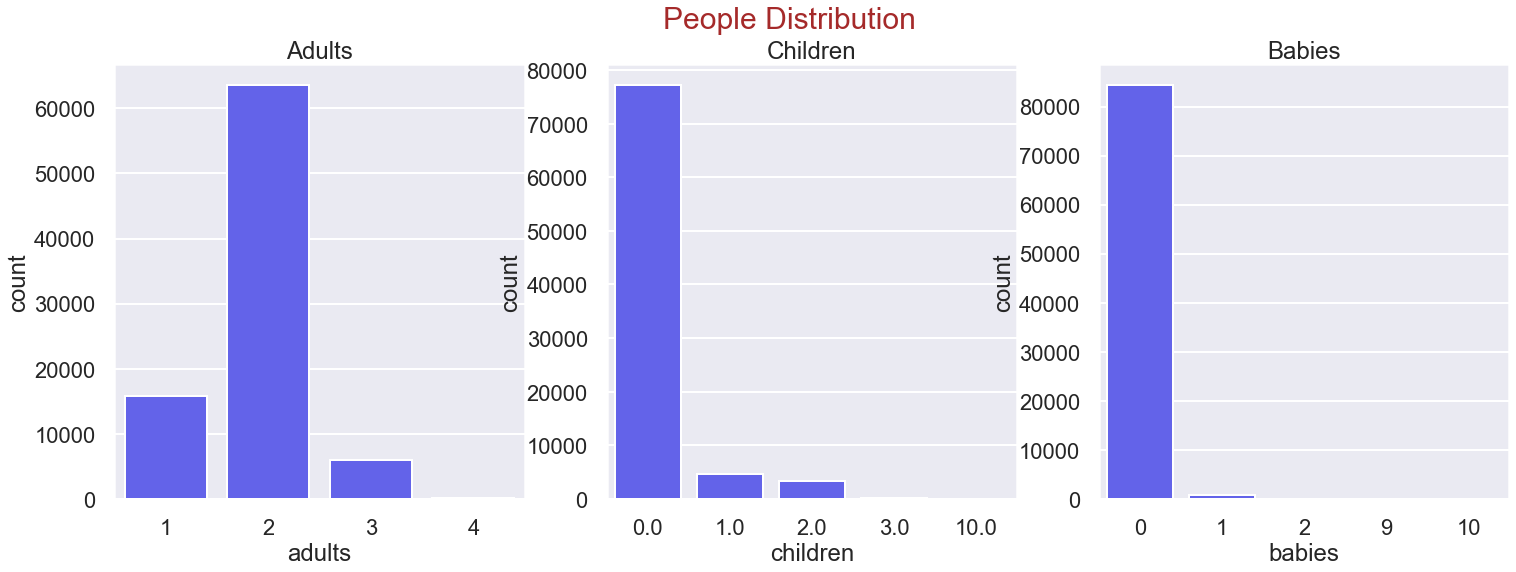

In [34]:
family = ['adults', 'children', 'babies']
fig, ax = plt.subplots(1,3, figsize=(25,8))

for i,f in enumerate(family):
    fig.sca(ax[i])
    sns.countplot(data=data, x=f, color='#4d4dff')
    plt.title(f'{f.title()}')

fig.suptitle('People Distribution', fontsize=30, color='brown')

<AxesSubplot:ylabel='Frequency'>

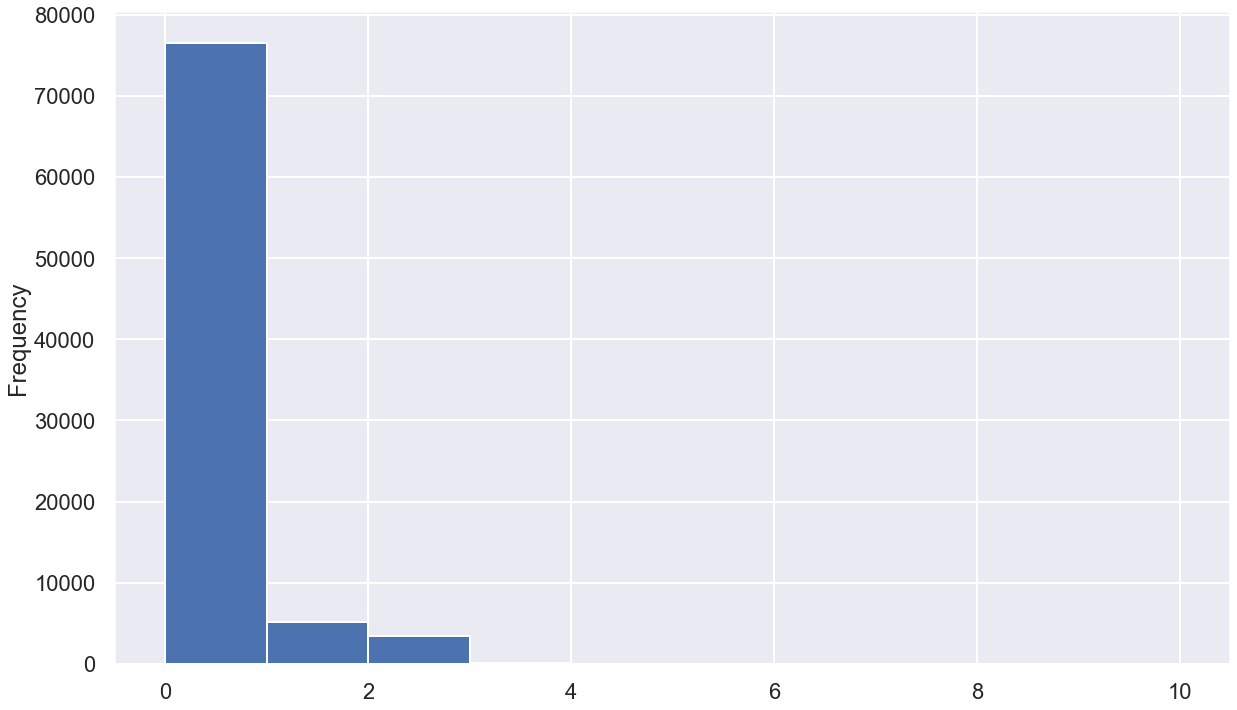

In [35]:
data[['children','babies']].sum(axis=1).plot(kind='hist')

Text(0.5, 1.0, 'Children In Families')

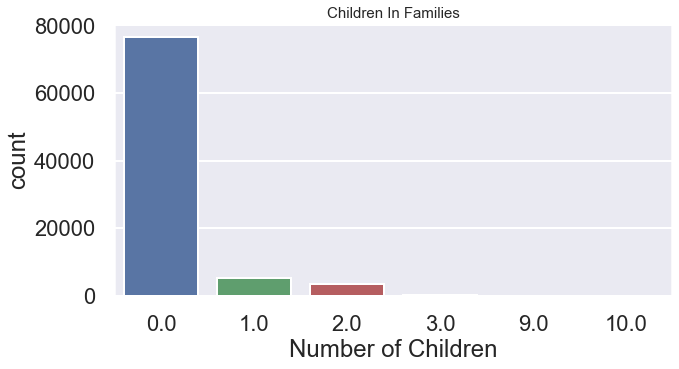

In [36]:
plt.figure(figsize=(10,5))
children = data[['children','babies']].sum(axis=1)
sns.countplot(x=children)
plt.xlabel('Number of Children')
plt.title('Children In Families', fontsize=15)

#              

<AxesSubplot:ylabel='Frequency'>

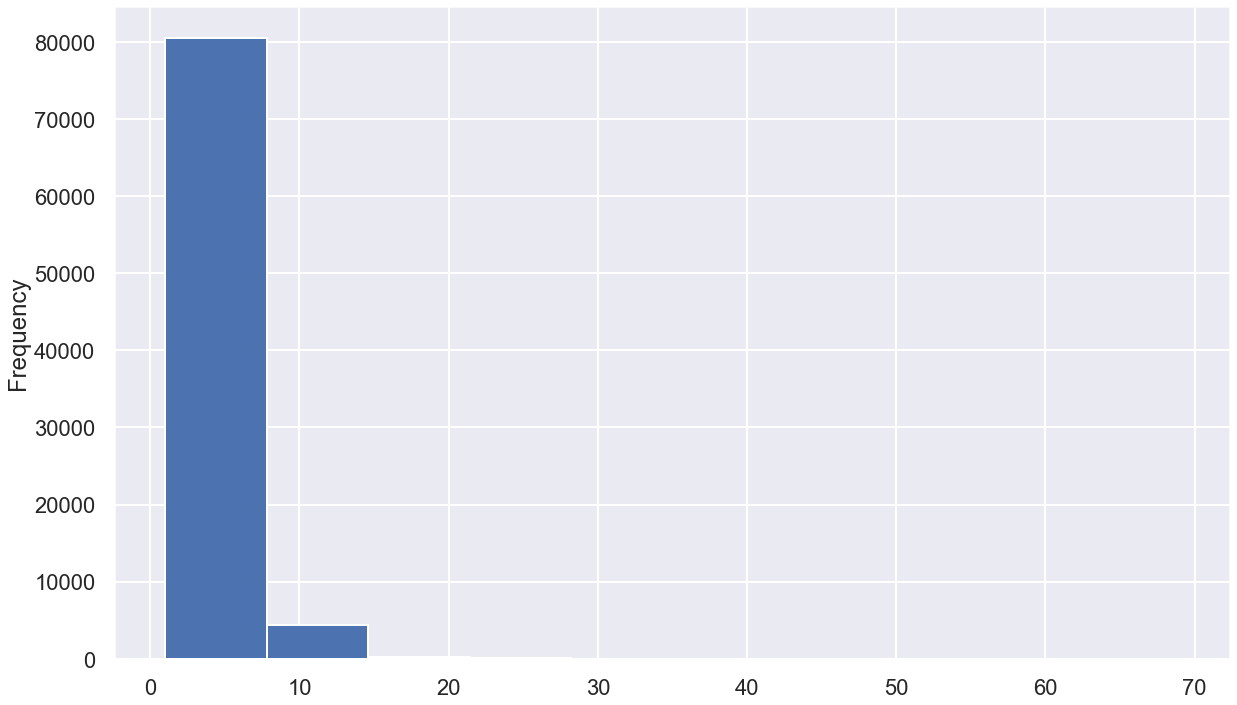

In [37]:
data[['stays_in_weekend_nights', 'stays_in_week_nights']].sum(axis=1).plot(kind='hist')

Text(0.5, 1.0, 'Number Of Days That Customers Stay')

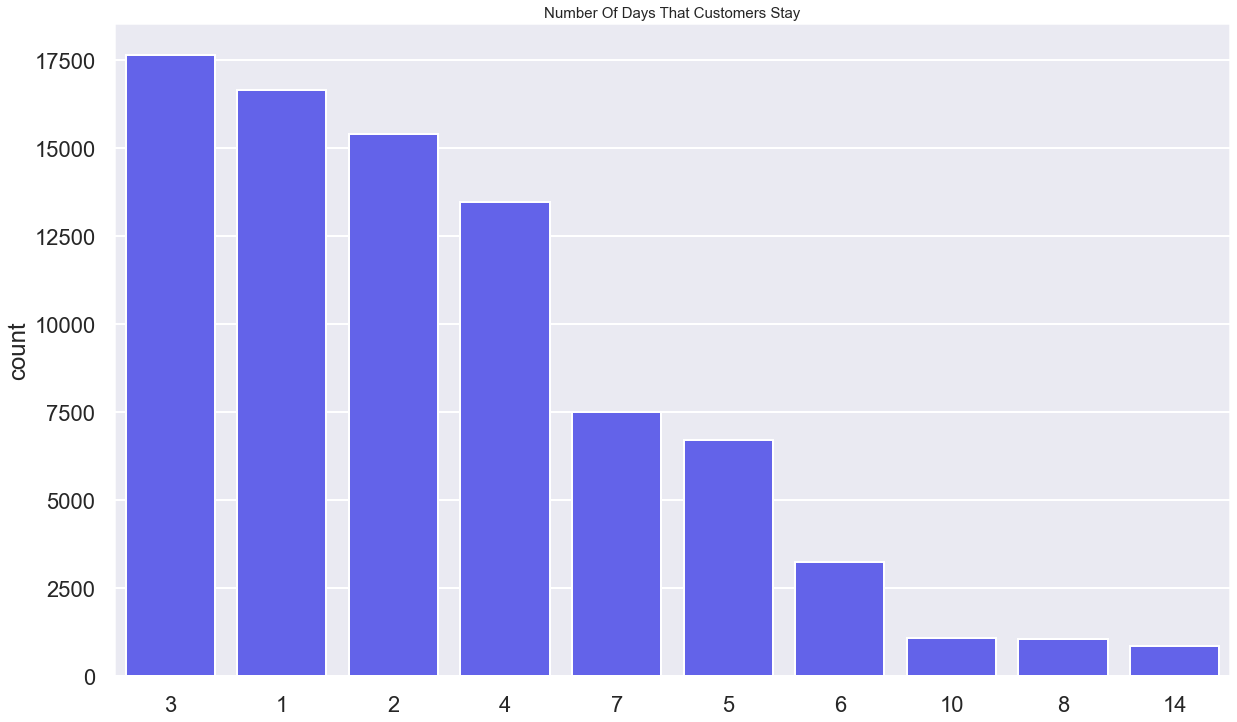

In [38]:
days = data[['stays_in_weekend_nights', 'stays_in_week_nights']].sum(axis=1)
sns.countplot(x=days, order=days.value_counts().index[:10], color='#4d4dff')
plt.title('Number Of Days That Customers Stay', fontsize=15)

#                

Text(0, 0.5, '')

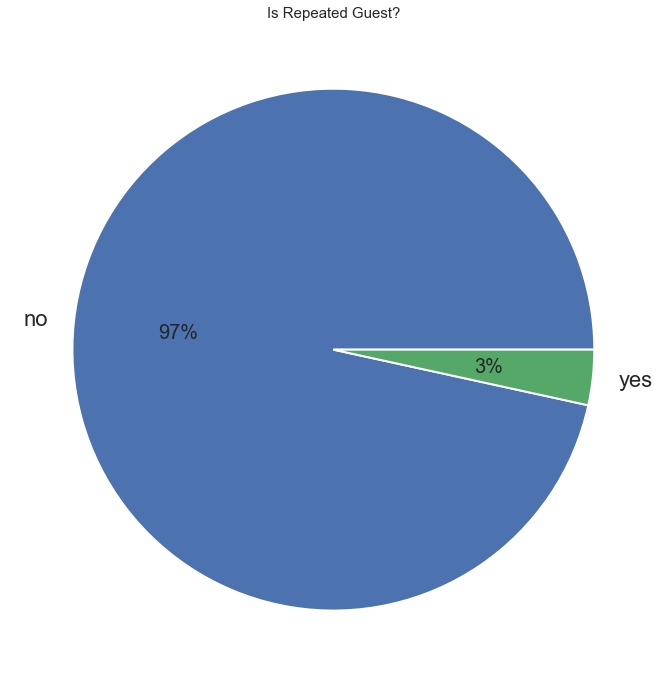

In [39]:
data['is_repeated_guest'].value_counts().plot(kind='pie', autopct='%0.0f%%')
plt.title('Is Repeated Guest?', fontsize=15)
plt.ylabel('')

In [40]:
def show_plot(col, hue=None, size=(10,5), title=None):
    """
    col  : column in data frame to plot
    hue  : plot column according to another column
    size : size of the plot
    title: give a title for the plot
    """
    plt.figure(figsize=size)
    sns.countplot(data=data, x=col, hue=hue)
    plt.title(f'{col.title()}', fontsize=15) if title==None else plt.title(title)

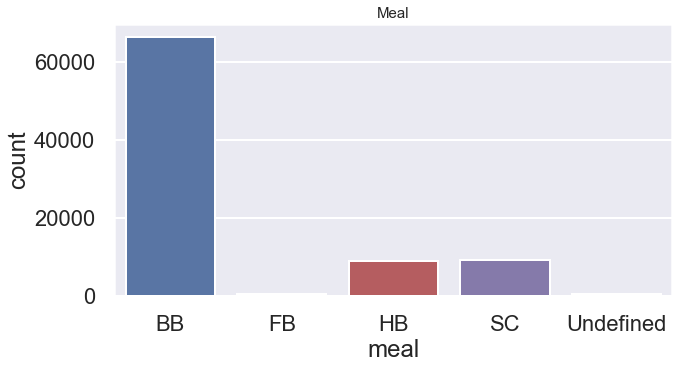

In [41]:
show_plot('meal')

Text(0.5, 1.0, 'Most Popular Arrival Month')

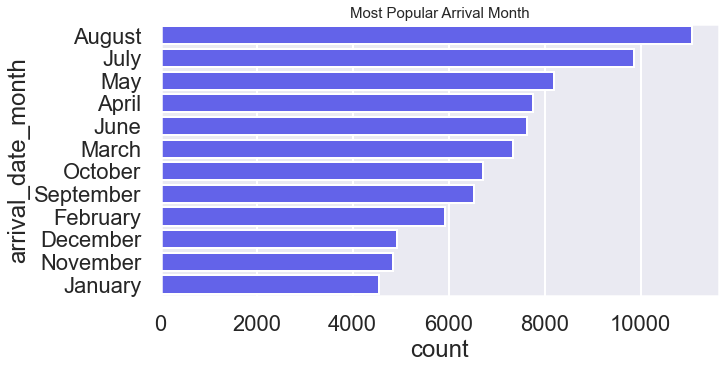

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='arrival_date_month', 
              order=data['arrival_date_month'].value_counts().index,
             color='#4d4dff')
plt.title('Most Popular Arrival Month', fontsize=15)

> We can observe that the demand increase in the summer like August, July, and May, and this demand decrease in the first and end of the year like November, December, and January.

Text(0.5, 1.0, 'Which year have lots of customers?')

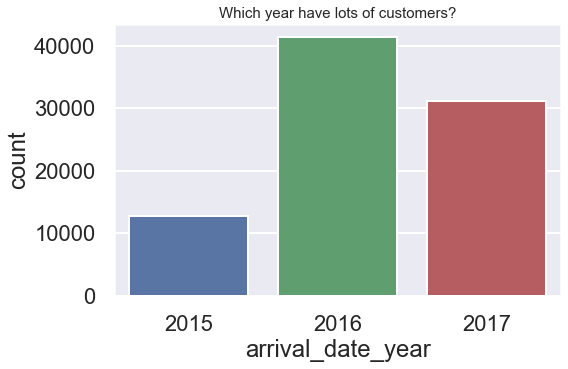

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='arrival_date_year')
plt.title('Which year have lots of customers?', fontsize=15)

Text(0.5, 1.0, 'Country')

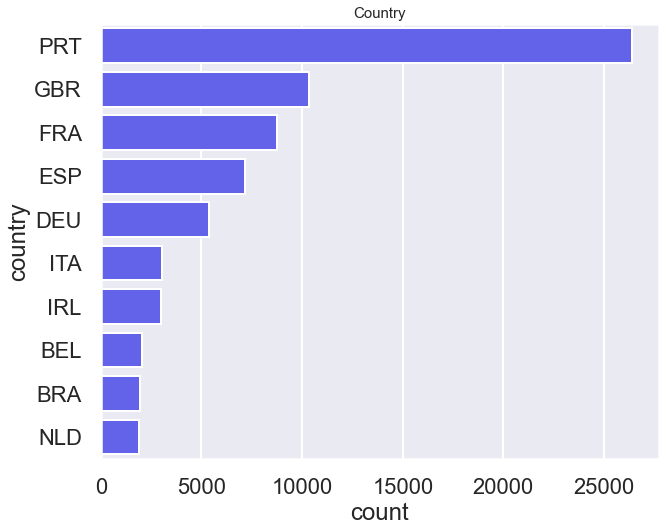

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(data=data, y='country', order=data['country'].value_counts().index[:10], color='#4d4dff')
plt.title('Country', fontsize=15)

Text(0.5, 0.93, 'Months In Each Year')

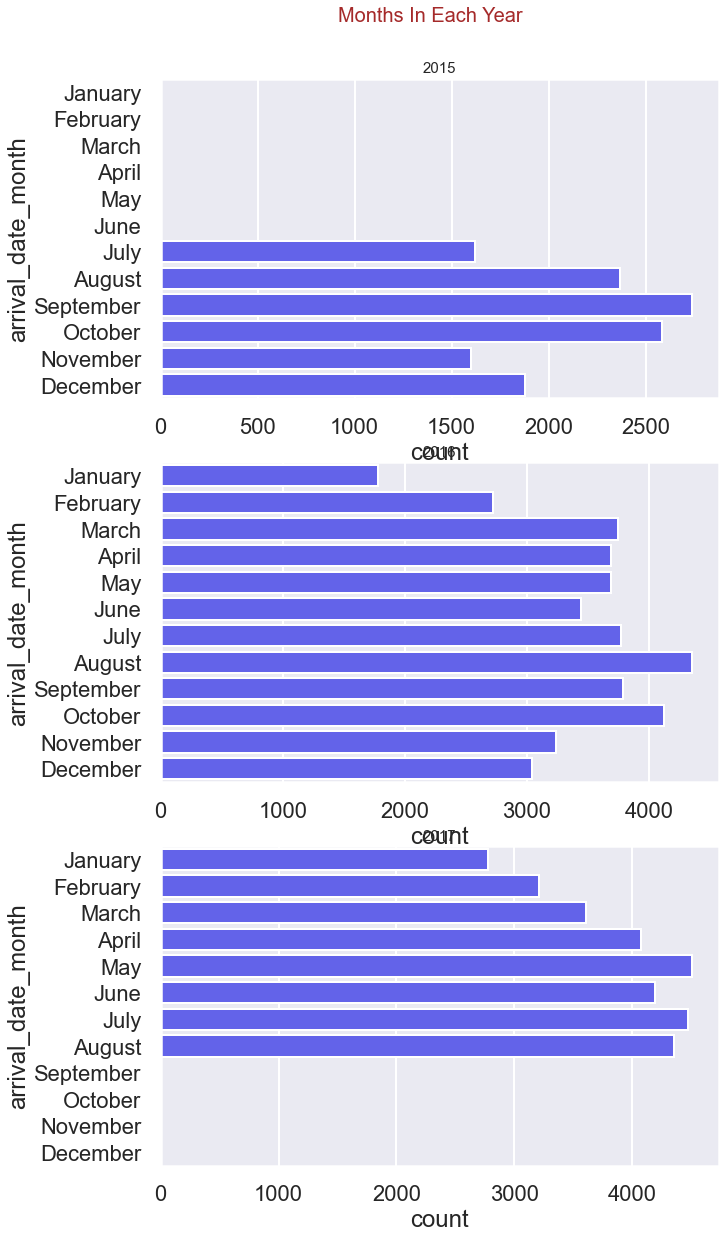

In [45]:
year_2015 = data[data['arrival_date_year']==2015] 
year_2016 = data[data['arrival_date_year']==2016] 
year_2017 = data[data['arrival_date_year']==2017]

years=[2015,2016,2017]
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, ax = plt.subplots(3,1, figsize=(10,20))

for i,year in enumerate([year_2015, year_2016, year_2017]):
    fig.sca(ax[i])
    
    sns.countplot(data=year, y='arrival_date_month', color='#4d4dff', order=order)
    plt.title(years[i], fontsize=15)
fig.suptitle('Months In Each Year',fontsize=20, color='brown', y=.93)

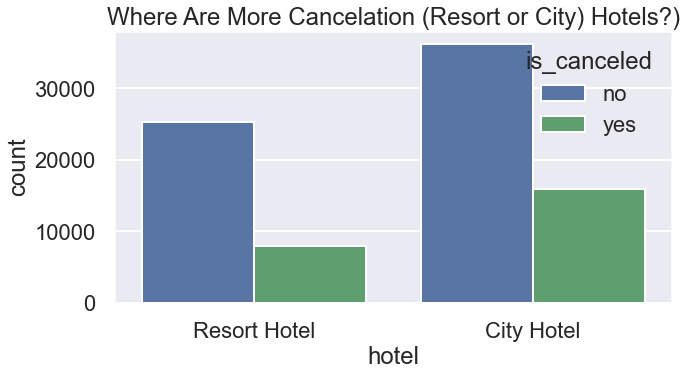

In [46]:
show_plot(col ='hotel',hue = 'is_canceled', title='Where Are More Cancelation (Resort or City) Hotels?)')

> Most booking which are canceled in city hotel

##         

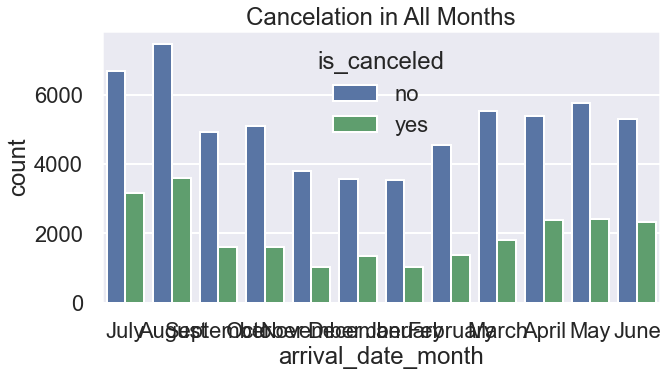

In [47]:
# Test & listen to their insights for this plot
show_plot('arrival_date_month', 'is_canceled', title='Cancelation in All Months')

#                 

Text(0.5, 0.93, 'Cancelation In Each Year')

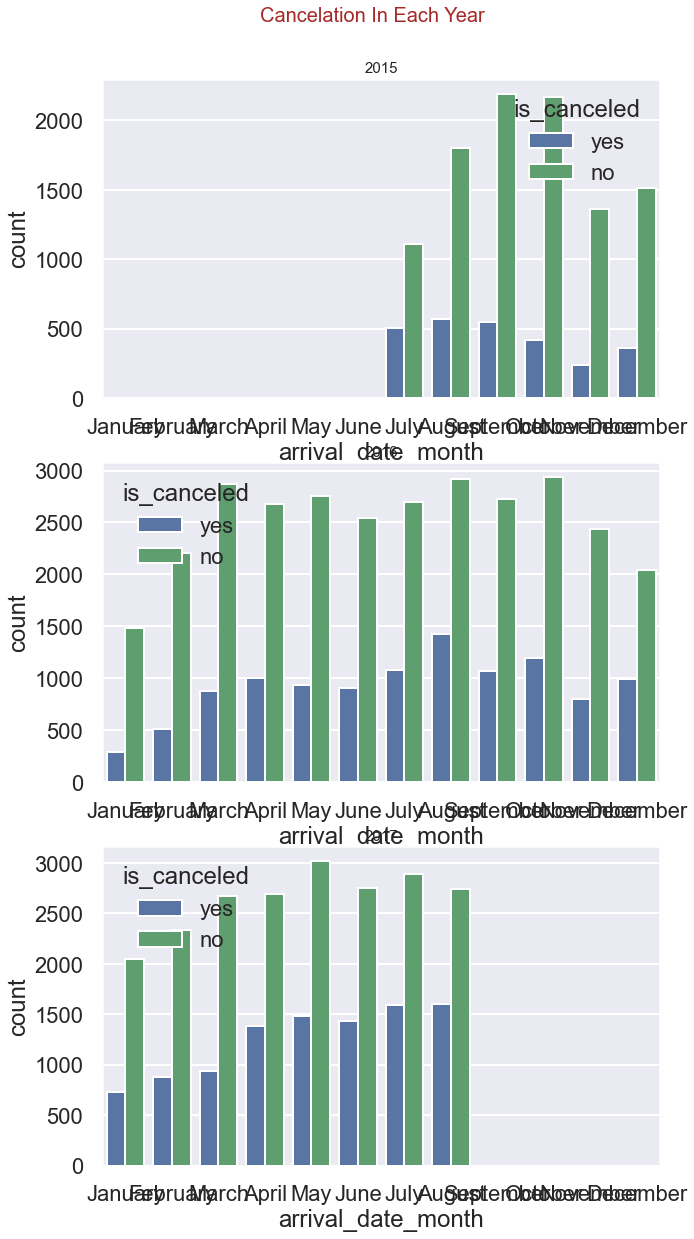

In [48]:
year_2015 = data[data['arrival_date_year']==2015] 
year_2016 = data[data['arrival_date_year']==2016] 
year_2017 = data[data['arrival_date_year']==2017]

order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, ax = plt.subplots(3,1, figsize=(10,20))

years = [2015,2016,2017]
for i,year in enumerate([year_2015, year_2016, year_2017]):
    fig.sca(ax[i])
    
    sns.countplot(data=year, x='arrival_date_month', hue='is_canceled',  order=order, hue_order=['yes','no'])
    plt.title(f'{years[i]}', fontsize=15)
fig.suptitle('Cancelation In Each Year',fontsize=20, color='brown', y=.93)

### Another Effection Way 👇🏻          

Text(0.5, 1, 'Cancelation in Previous Years')

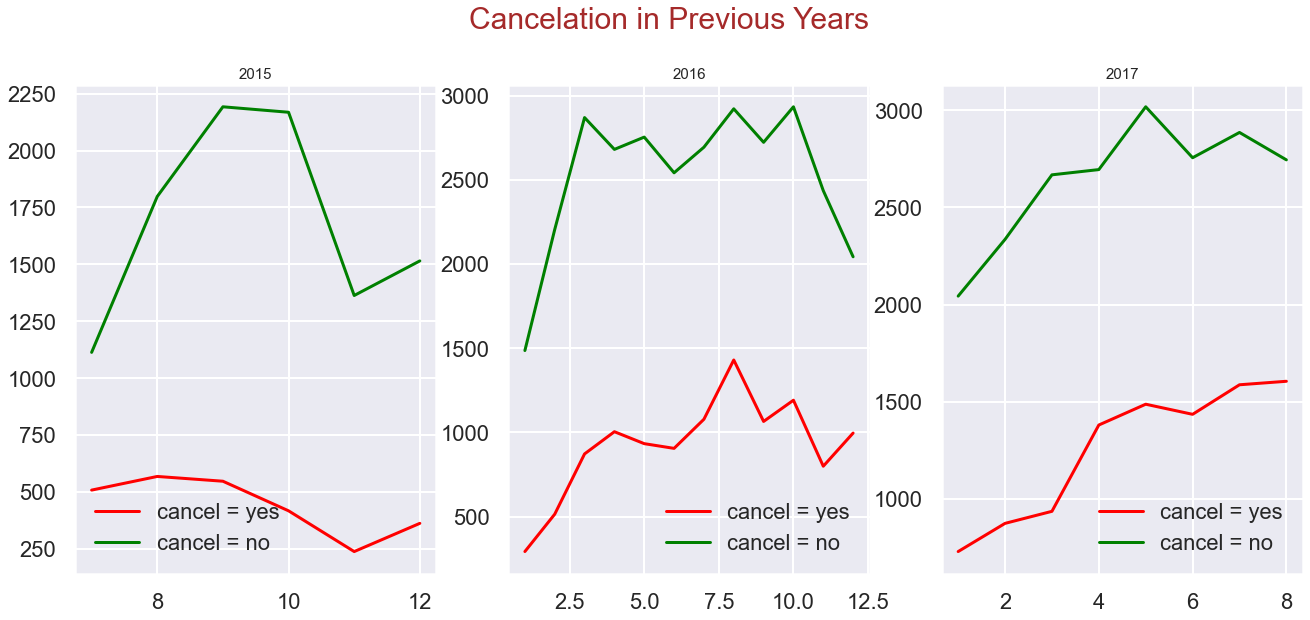

In [49]:
cancelation = data[data['is_canceled']=='yes']
no_cancelation = data[data['is_canceled']=='no']

cancel_2015 = cancelation[cancelation['arrival_date_year']==2015]
cancel_2016 = cancelation[cancelation['arrival_date_year']==2016]
cancel_2017 = cancelation[cancelation['arrival_date_year']==2017]

no_cancel_2015 = no_cancelation[no_cancelation['arrival_date_year']==2015]
no_cancel_2016 = no_cancelation[no_cancelation['arrival_date_year']==2016]
no_cancel_2017 = no_cancelation[no_cancelation['arrival_date_year']==2017]

cancel = [cancel_2015, cancel_2016, cancel_2017]
no_cancel = [no_cancel_2015, no_cancel_2016, no_cancel_2017]

fig, ax = plt.subplots(1,3, figsize=(22,9))

count=0
years=[2015,2016,2017]
for c, n_c in zip(cancel, no_cancel):
    y1 = c.groupby('month')['is_canceled'].count()
    y2= n_c.groupby('month')['is_canceled'].count()
    
    fig.sca(ax[count])
    plt.plot(y1.index, y1.values, color='red')
    plt.plot(y2.index, y2.values, color='green')
    plt.title(f'{years[count]}', fontsize=15)
    plt.legend(['cancel = yes', 'cancel = no'])
    count+=1
    
fig.suptitle('Cancelation in Previous Years', color='brown', fontsize=30, y=1)

> We can observe that the rate of cancelation increases around the months in different years. It may be because of some problem with services or most customers are busy

##               

Text(0.5, 1.0, 'Average Lead Time According To Arrival Year')

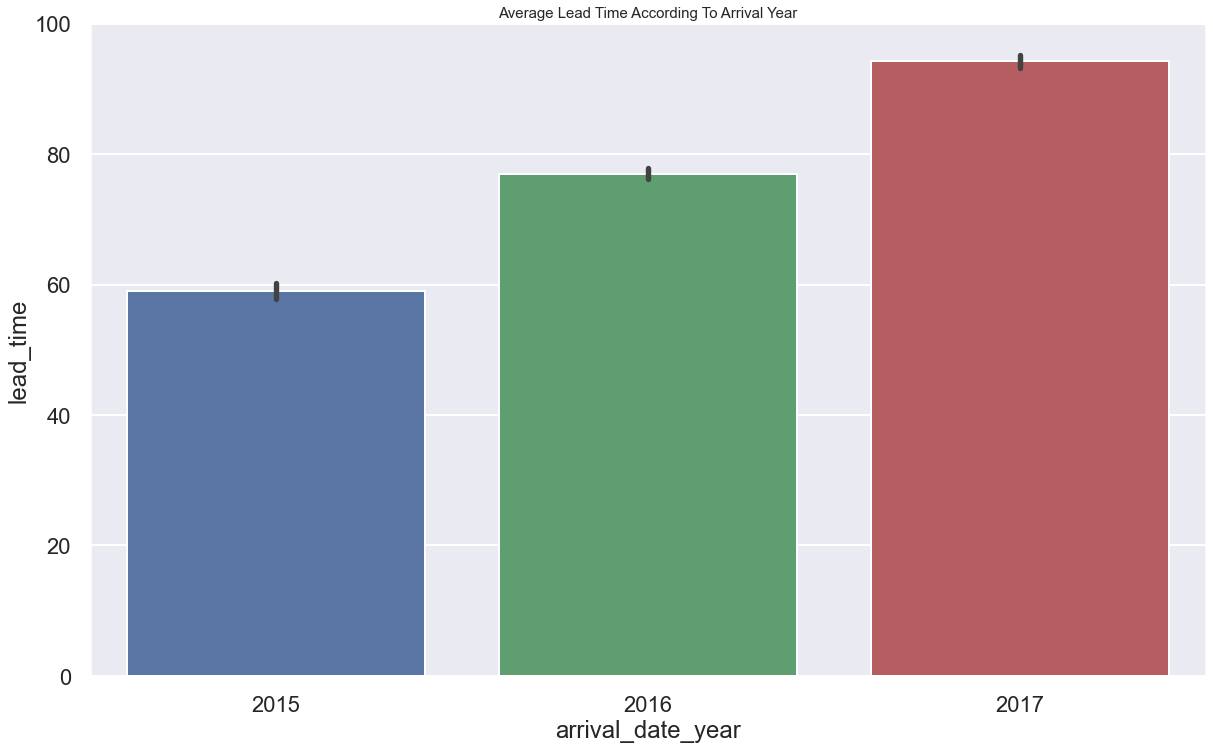

In [50]:
sns.barplot(data=data, x='arrival_date_year', y='lead_time')
plt.title('Average Lead Time According To Arrival Year', fontsize=15)

> As we can see the average increases over the three years, so it may mean that there is a demand for these hotels so that customers tend to make reservations a lot earlier.

In [51]:
data.groupby('arrival_date_year')['lead_time'].mean()

arrival_date_year
2015    59.055360
2016    77.015011
2017    94.261406
Name: lead_time, dtype: float64

##            

Text(0.5, 1.0, 'Average Lead Time According To Arrival Year & Hotel')

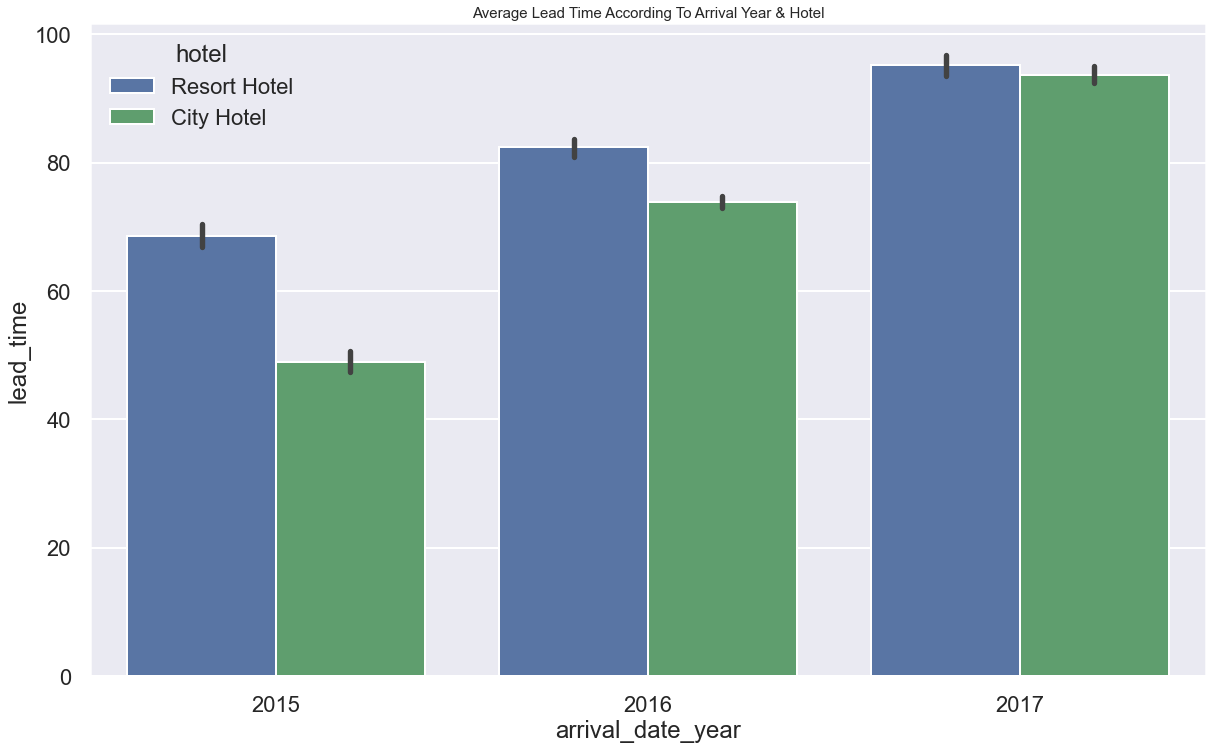

In [52]:
sns.barplot(data=data, x='arrival_date_year', y='lead_time', hue='hotel')
plt.title('Average Lead Time According To Arrival Year & Hotel', fontsize=15)

> The rate of average lead time is increasing for resort hotels. we can say that may be because of the congestion and the demand.

Text(0.5, 1.0, 'Lead Time Average For Cancelation')

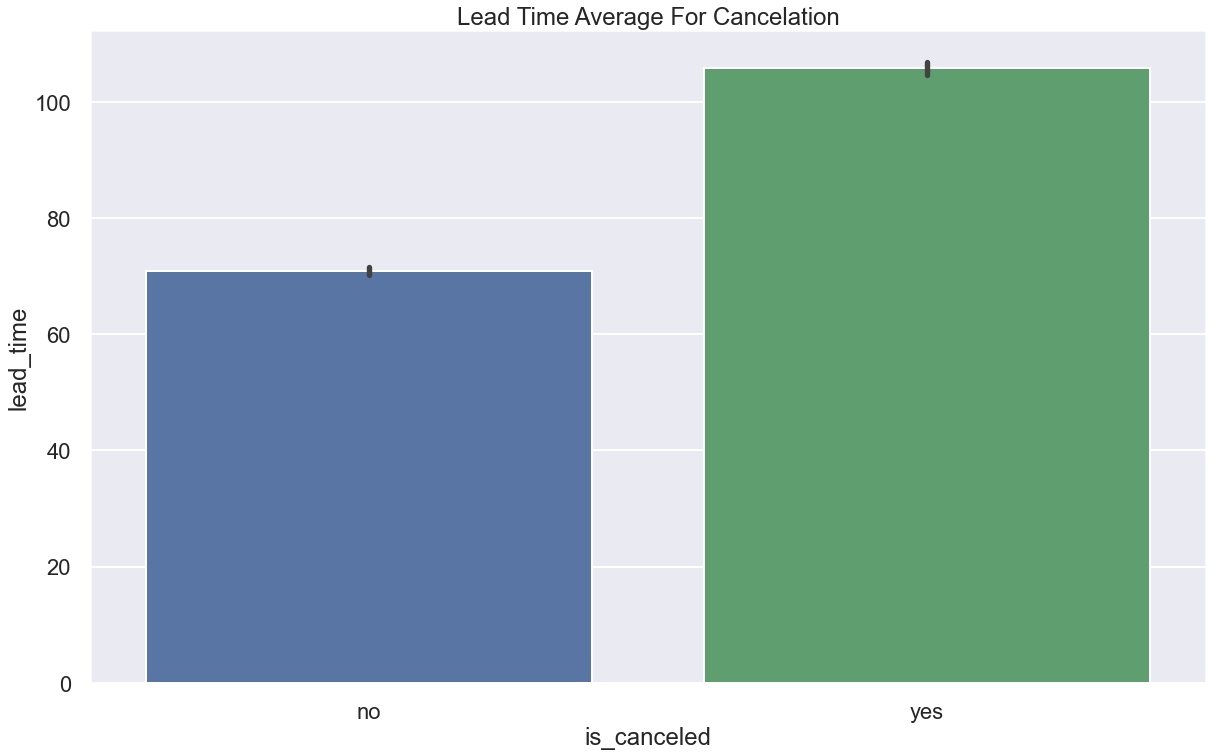

In [53]:
sns.barplot(data=data, x='is_canceled', y='lead_time')
plt.title('Lead Time Average For Cancelation')

In [54]:
data.groupby('is_canceled')['lead_time'].mean()

is_canceled
no      70.899427
yes    105.838763
Name: lead_time, dtype: float64

<AxesSubplot:xlabel='booking_changes', ylabel='Count'>

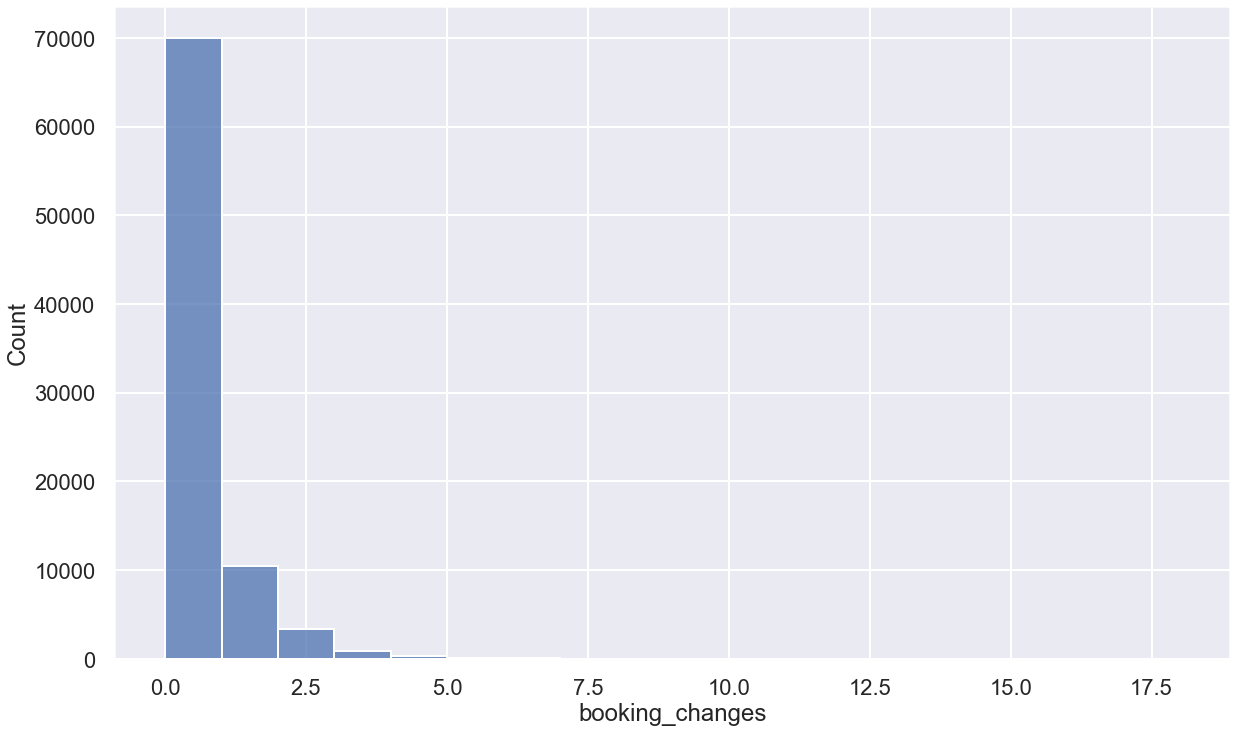

In [55]:
sns.histplot(data=data, x='booking_changes')